# Imports

In [90]:
import numpy as np
import pandas as pd
import geopandas
import folium
from branca.element import Figure
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly_express as px
import osv

## Graphing Styles

In [176]:
mpl.rcParams['figure.figsize']=(12,6)
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.style.available

In [6]:
plt.style.use('ggplot')

In [127]:
sns.set_style('darkgrid')

# Data Loading

In [8]:
crime = pd.read_csv("../data/dataset-limpo.csv")

# Initial Analysis

In [9]:
crime.columns

Index(['id', 'bairro', 'created_at', 'descricao', 'endereco', 'id.1',
       'ip_address_origin', 'latitude', 'longitude', 'registrou_bo', 'sexo',
       'tipo_assalto_id', 'titulo', 'uri', 'user_id', 'valor_prejuizo',
       'Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito',
       'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos',
       'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook',
       'Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'time'],
      dtype='object')

In [10]:
crime.shape

(12899, 36)

In [11]:
crime.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000


In [12]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12899 entries, 0 to 12898
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12899 non-null  int64  
 1   bairro              11196 non-null  object 
 2   created_at          12899 non-null  object 
 3   descricao           12898 non-null  object 
 4   endereco            12899 non-null  object 
 5   id.1                12899 non-null  int64  
 6   ip_address_origin   11705 non-null  object 
 7   latitude            12899 non-null  float64
 8   longitude           12899 non-null  float64
 9   registrou_bo        12375 non-null  object 
 10  sexo                12899 non-null  int64  
 11  tipo_assalto_id     12899 non-null  int64  
 12  titulo              12899 non-null  object 
 13  uri                 12899 non-null  object 
 14  user_id             1166 non-null   float64
 15  valor_prejuizo      12899 non-null  float64
 16  Bici

As colunas id, id.1, ip_address_origin nao tem relevância para a análise e por isso serão eliminadas

In [13]:
crime.drop(['id','id.1','ip_address_origin', 'user_id', 'uri'], axis = 1, inplace = True)

# Missing Values

As colunas Bicicleta a TV são variáveis booleanas que indicam se o referido item foi roubado na ocorrência. As ocorrências onde um item não foi dado como furtado foram atribuídas como NA durante o Scraping. O mesmo ocorre com a variáivel de registro de BO. Para viabilizar as operações com essas colunas, os valores NA serão substituídos por False.

In [14]:
crime.loc[:,'Bicicleta':'Tv'] = crime.loc[:,'Bicicleta':'Tv'].fillna(value = False)

In [15]:
crime.loc[:,'registrou_bo'] = crime.loc[:,'registrou_bo'].fillna(value = False)

## Events Through Time

### Occurrences over the years

In [16]:
crime['time'] = pd.to_datetime(crime.time)
crime['created_at'] = pd.to_datetime(crime.created_at)


In [17]:
crime.time.min(), crime.time.max()

(Timestamp('2010-03-14 09:26:00'), Timestamp('2018-03-20 22:05:00'))

Os eventos registram ocorrência do mês de março de 2010 até o março de 2018.

In [18]:
crime.columns[11:30]

Index(['Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito',
       'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos',
       'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook',
       'Outros', 'Relógio', 'Som', 'Tablet', 'Tv'],
      dtype='object')

In [21]:
ts = crime.set_index('time').iloc[:,11:30].resample('3M').sum()

In [22]:
ts['Total'] = ts.sum(axis=1)

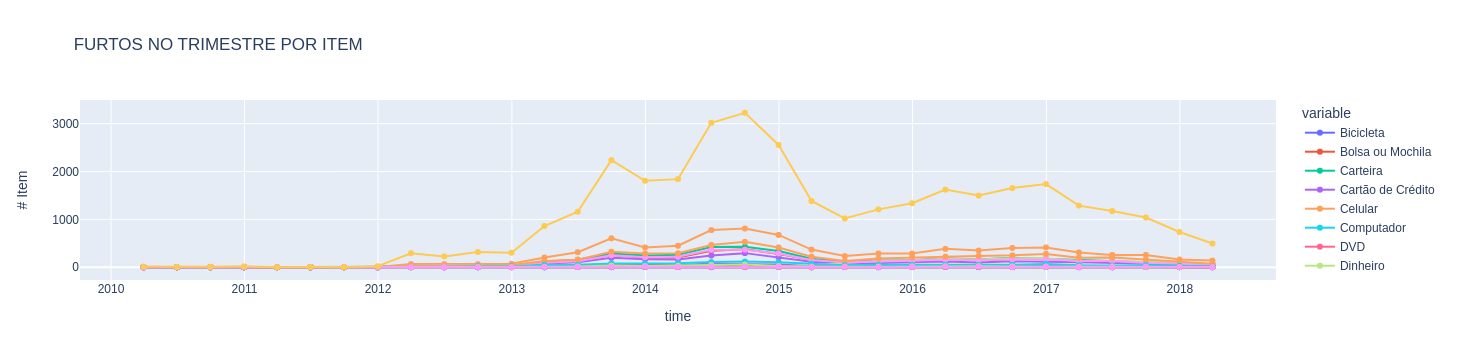

In [27]:
px.line(data_frame=ts, markers = 'x', labels={'value': '# Item', 'y':'Time'}, title = 'FURTOS NO TRIMESTRE POR ITEM')

* Pico de ocorrências durante o ano de 2014, segundo uma tendência de queda a partir do ano de 2017
* O ranking de itens mais roubados permanece estável no decorrer dos anos <br>
  A seguir será verificado o período do dia em que esses furtos ocorrem

### Events per period of the day

Para esta análise, o dia foi dividido em 4 períodos de 6 horas, sendo:
   * 00:00 -- 05:59h -> Madrugada
   * 06:00 -- 11:59h -> Manhã
   * 12:00 -- 17:59h -> Tarde
   * 18:00 -- 23:59h -> Noite <br><br>
Tal como foi codificado na função criada a seguir:

In [52]:
def periodo(hora):
    if (hora >=0) & (hora<6):
        return 'madrugada'
    elif (hora>=6) & (hora<12):
        return 'manhã'
    elif (hora > 12) & (hora < 18):
        return 'tarde'
    else:
        return 'noite'

In [54]:
crime['period'] = crime.time.dt.hour.apply(periodo)

In [97]:
period_df = crime.melt(id_vars = ['period'], value_vars = crime.columns[11:30], var_name = 'item')

In [ ]:
period_df.

,period,item,value
0,noite,Bicicleta,False
1,tarde,Bicicleta,False
2,tarde,Bicicleta,False
3,noite,Bicicleta,False
4,manhã,Bicicleta,False
...,...,...,...
245076,noite,Tv,False
245077,noite,Tv,False
245078,tarde,Tv,False
245079,noite,Tv,False


In [ ]:
period_df = period_df[period_df.value].groupby(['period','item']).sum().reset_index()

In [170]:
period_df = period_df.sort_values(by='value', ascending = False)

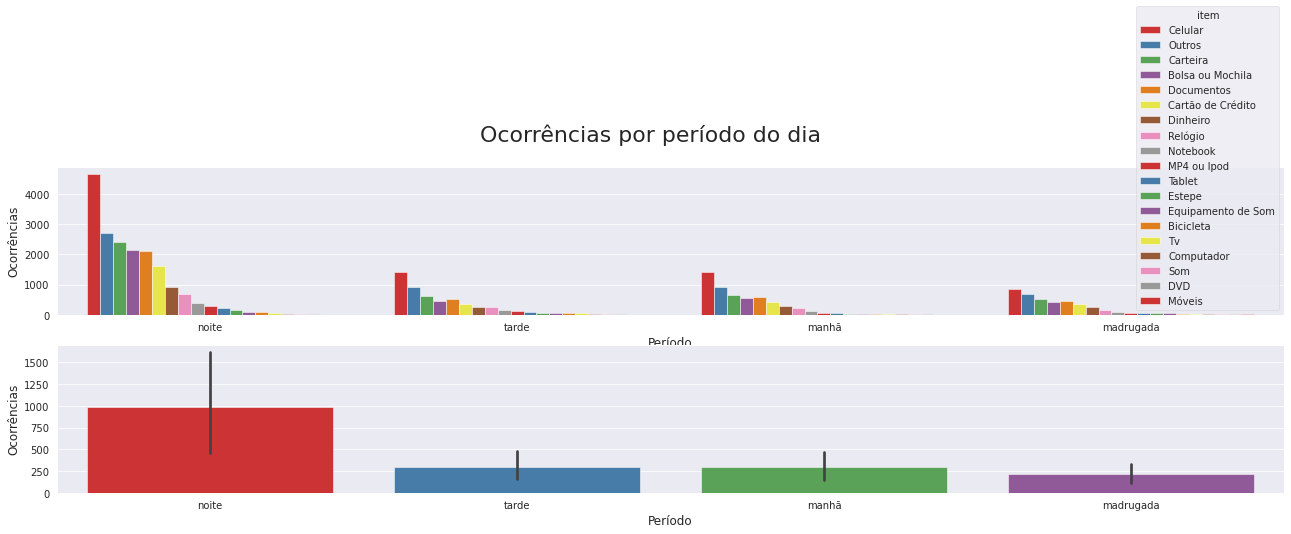

In [180]:
f, ax = plt.subplots(nrows = 2, sharex = False, figsize=(22,6))
sns.barplot(x='period', hue='item',y='value', data = period_df, palette = 'Set1', ax = ax[0])
sns.barplot(x='period', y = 'value', data = period_df, palette = 'Set1', ax = ax[1])

plt.suptitle("Ocorrências por período do dia", fontsize = 22)

ax[0].set_ylabel('Ocorrências')
ax[0].set_xlabel('Período')

ax[1].set_xlabel('Período')
ax[1].set_ylabel('Ocorrências')

plt.show()

Para a maior parte dos itens, o período da noite(18h-00h) parece ser onde ocorre a maior parte das ocorrências para todos os itens que são furtados. Os períodos manhã e tarde apresentam números idênticos, não parecendo apresentar níveis de periculosidade diferente do outro, o que pode ser validado por um teste de hipóteses

# Most recurrent Items

In [108]:
def plot_most_recurrent(crime):
    recurrent_items = crime.loc[:,'Bicicleta':'Tv'].sum().sort_values(ascending = False)
    
    plt.figure(figsize=(18,6))
    plt.bar(x=recurrent_items.index, height = recurrent_items.values)
    plt.xticks(rotation = 45)
    plt.title('Itens mais roubados em ocorrências')
    plt.xlabel('Itens')
    plt.ylabel('Qtd de furtos')
    plt.show()

In [ ]:
def plot_genre(crime):
    recurrent_items = crime.loc[:,'Bicicleta':'Tv'].sum().sort_values(ascending = False)

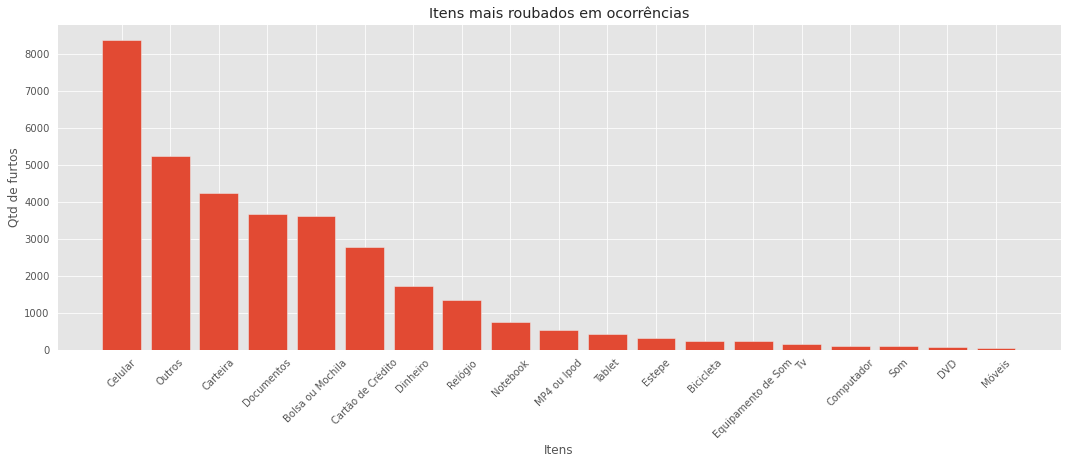

In [109]:
plot_most_recurrent(crime)

In [43]:
crime_location = crime[['bairro','endereco','latitude','longitude','sexo','time','valor_prejuizo']]

Coordenadas da cidade de São Paulo (Google): <br>
Latitude	-23.618237 <br>
Longitude	-46.635197

In [47]:
fig=Figure(width=550,height=350)
sp = folium.Map(location = [-23.618237,-46.635197], zoom_start = 11, min_zoom = 10)
fig.add_child(sp)